# Milestone #1

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("2022_Yellow_Taxi_Trip_Data_20240305.csv")

In [4]:
df

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount
0,04/18/2023 02:30:05 PM,1.0,0.93,1,52.0
1,01/01/2023 12:31:23 AM,1.0,3.06,1,15.6
2,01/01/2023 12:05:11 AM,1.0,3.62,1,28.9
3,01/01/2023 12:03:33 AM,6.0,1.19,1,10.0
4,01/01/2023 12:01:43 AM,1.0,0.16,1,12.0
...,...,...,...,...,...
39656093,01/01/2001 01:52:48 AM,1.0,6.95,1,22.0
39656094,01/01/2001 01:23:51 AM,1.0,4.68,2,20.5
39656095,01/01/2001 01:02:18 AM,1.0,3.10,1,14.0
39656096,01/01/2001 12:27:45 AM,1.0,0.88,2,6.0


In [5]:
df2 = df
df2.dtypes

tpep_pickup_datetime     object
passenger_count         float64
trip_distance           float64
payment_type              int64
fare_amount             float64
dtype: object

In [6]:
df2["tpep_pickup_datetime"] = pd.to_datetime(df2["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")

In [7]:
df2.dtypes
df2

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount
0,2023-04-18 14:30:05,1.0,0.93,1,52.0
1,2023-01-01 00:31:23,1.0,3.06,1,15.6
2,2023-01-01 00:05:11,1.0,3.62,1,28.9
3,2023-01-01 00:03:33,6.0,1.19,1,10.0
4,2023-01-01 00:01:43,1.0,0.16,1,12.0
...,...,...,...,...,...
39656093,2001-01-01 01:52:48,1.0,6.95,1,22.0
39656094,2001-01-01 01:23:51,1.0,4.68,2,20.5
39656095,2001-01-01 01:02:18,1.0,3.10,1,14.0
39656096,2001-01-01 00:27:45,1.0,0.88,2,6.0


## Filter the data to work with a smaller df

In [9]:
filter_2022 = df2["tpep_pickup_datetime"].dt.year == 2022
filter_june = df2["tpep_pickup_datetime"].dt.month == 6
filter_day04 = df2["tpep_pickup_datetime"].dt.day == 4

df3 = df2[filter_2022 & filter_june & filter_day04]

# Step 5: cleaning your data

#### fare_amount column have negative numbers and a 6999 row fare which looks like a error

In [12]:
df3.sort_values("fare_amount", ascending = False)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount
22987864,2022-06-04 11:45:57,4.0,14.80,2,6999.0
22974936,2022-06-04 13:37:38,2.0,0.00,2,450.0
23013339,2022-06-04 02:21:40,1.0,0.00,2,345.0
22931482,2022-06-04 19:22:56,1.0,95.68,2,340.0
22913402,2022-06-04 22:05:44,2.0,47.40,1,300.0
...,...,...,...,...,...
22999009,2022-06-04 09:44:07,1.0,0.00,4,-100.0
22988214,2022-06-04 11:42:57,4.0,46.32,2,-198.0
22987269,2022-06-04 11:51:23,1.0,0.00,4,-250.0
23007213,2022-06-04 06:04:52,3.0,73.86,2,-284.0


In [13]:
def fare_error(x):
    if x > 450:
        return 1
    elif x <= 0:
        return 1
    else:
        return 0

In [14]:
df3["fare_error"] = df3["fare_amount"].apply(fare_error)

/tmp/ipykernel_1747/2281713896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["fare_error"] = df3["fare_amount"].apply(fare_error)


In [15]:
df3.sort_values("fare_amount", ascending = False)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22987864,2022-06-04 11:45:57,4.0,14.80,2,6999.0,1
22974936,2022-06-04 13:37:38,2.0,0.00,2,450.0,0
23013339,2022-06-04 02:21:40,1.0,0.00,2,345.0,0
22931482,2022-06-04 19:22:56,1.0,95.68,2,340.0,0
22913402,2022-06-04 22:05:44,2.0,47.40,1,300.0,0
...,...,...,...,...,...,...
22999009,2022-06-04 09:44:07,1.0,0.00,4,-100.0,1
22988214,2022-06-04 11:42:57,4.0,46.32,2,-198.0,1
22987269,2022-06-04 11:51:23,1.0,0.00,4,-250.0,1
23007213,2022-06-04 06:04:52,3.0,73.86,2,-284.0,1


In [16]:
df4 = df3.drop(df3[df3['fare_error'] == 1].index)


In [17]:
df4.sort_values("fare_amount").head(10)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22937414,2022-06-04 18:38:36,1.0,0.0,1,0.01,0
23008474,2022-06-04 04:26:13,1.0,0.0,2,0.01,0
22985399,2022-06-04 12:08:17,2.0,5.2,3,0.01,0
22978393,2022-06-04 13:08:33,1.0,0.0,3,0.01,0
23011794,2022-06-04 02:50:37,1.0,0.0,2,0.01,0
23019027,2022-06-04 00:55:36,1.0,1.0,3,0.01,0
22955889,2022-06-04 16:16:32,1.0,0.0,1,0.01,0
22937509,2022-06-04 18:37:58,4.0,0.1,4,0.01,0
22995046,2022-06-04 10:33:10,0.0,27.2,2,0.01,0
23016515,2022-06-04 01:30:26,1.0,0.0,3,0.01,0


### The minimum fare is $2.50

In [19]:
df5 = df4.drop(df4[df4['fare_amount'] < 2.50 ].index)


In [20]:
df5.sort_values("fare_amount").head(10)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22942380,2022-06-04 18:01:57,0.0,0.00,3,2.5,0
22962935,2022-06-04 15:17:36,1.0,0.00,4,2.5,0
22994842,2022-06-04 10:35:38,0.0,0.00,2,2.5,0
23007583,2022-06-04 05:34:22,6.0,0.02,2,2.5,0
22993588,2022-06-04 10:49:04,0.0,0.00,2,2.5,0
22909910,2022-06-04 22:38:38,1.0,0.11,2,2.5,0
22981745,2022-06-04 12:40:12,1.0,0.00,2,2.5,0
22951466,2022-06-04 16:51:45,1.0,0.07,2,2.5,0
22936764,2022-06-04 18:43:25,1.0,0.03,1,2.5,0
23007578,2022-06-04 05:35:01,1.0,0.00,1,2.5,0


### Clean the trip distance

In [22]:
df5.sort_values("trip_distance", ascending = False)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22975404,2022-06-04 13:34:00,NaN,133958.45,0,20.86,0
22913712,2022-06-04 22:03:00,NaN,47220.34,0,10.30,0
22981521,2022-06-04 12:42:00,NaN,21756.70,0,10.00,0
22931482,2022-06-04 19:22:56,1.0,95.68,2,340.00,0
22975583,2022-06-04 13:32:25,1.0,87.89,1,160.00,0
...,...,...,...,...,...,...
22984318,2022-06-04 12:17:54,1.0,0.00,1,2.50,0
22919395,2022-06-04 21:11:02,1.0,0.00,2,2.50,0
23010751,2022-06-04 03:13:55,1.0,0.00,1,75.00,0
23010750,2022-06-04 03:13:58,1.0,0.00,1,2.50,0


### Set a distance minimun of 0.5 miles

In [24]:
df5 = df5.drop(df5[df5['trip_distance'] < 0.5 ].index)
df5 = df5.drop(df5[df5['trip_distance'] >100 ].index)


In [25]:
df5.sort_values("trip_distance", ascending = False)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22931482,2022-06-04 19:22:56,1.0,95.68,2,340.0,0
22975583,2022-06-04 13:32:25,1.0,87.89,1,160.0,0
23007214,2022-06-04 06:04:52,3.0,73.86,2,284.0,0
22913600,2022-06-04 22:03:57,1.0,59.00,1,283.0,0
22907937,2022-06-04 22:56:20,0.0,54.20,2,144.0,0
...,...,...,...,...,...,...
22984004,2022-06-04 12:20:28,3.0,0.50,1,6.0,0
22968407,2022-06-04 14:32:49,2.0,0.50,1,4.0,0
22956885,2022-06-04 16:08:22,1.0,0.50,2,4.5,0
22913888,2022-06-04 22:01:26,1.0,0.50,1,5.0,0


### Clean passenger_count

In [27]:
df5.sort_values("passenger_count")

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22924262,2022-06-04 20:24:03,0.0,3.00,1,13.00,0
22928800,2022-06-04 19:43:39,0.0,0.80,1,6.00,0
22906827,2022-06-04 23:06:26,0.0,1.40,1,6.50,0
23001260,2022-06-04 09:08:44,0.0,1.90,2,8.50,0
23005561,2022-06-04 07:23:46,0.0,2.00,1,7.50,0
...,...,...,...,...,...,...
23023814,2022-06-04 00:01:11,NaN,16.55,0,53.05,0
23023834,2022-06-04 00:01:00,NaN,2.57,0,15.19,0
23023835,2022-06-04 00:01:00,NaN,3.58,0,19.82,0
23023867,2022-06-04 00:00:41,NaN,3.50,0,17.95,0


In [28]:
missing_rows = df5["passenger_count"].isna()
df5[missing_rows]

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22901413,2022-06-04 23:59:33,NaN,1.98,0,11.66,0
22901423,2022-06-04 23:59:27,NaN,6.15,0,26.33,0
22901444,2022-06-04 23:59:12,NaN,5.96,0,26.65,0
22901445,2022-06-04 23:59:12,NaN,1.91,0,13.38,0
22901458,2022-06-04 23:59:00,NaN,2.56,0,13.63,0
...,...,...,...,...,...,...
23023814,2022-06-04 00:01:11,NaN,16.55,0,53.05,0
23023834,2022-06-04 00:01:00,NaN,2.57,0,15.19,0
23023835,2022-06-04 00:01:00,NaN,3.58,0,19.82,0
23023867,2022-06-04 00:00:41,NaN,3.50,0,17.95,0


In [29]:
df5 = df5[~missing_rows]
df5.sort_values("passenger_count")

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22924262,2022-06-04 20:24:03,0.0,3.00,1,13.0,0
22928800,2022-06-04 19:43:39,0.0,0.80,1,6.0,0
22906827,2022-06-04 23:06:26,0.0,1.40,1,6.5,0
23001260,2022-06-04 09:08:44,0.0,1.90,2,8.5,0
23005561,2022-06-04 07:23:46,0.0,2.00,1,7.5,0
...,...,...,...,...,...,...
23013498,2022-06-04 02:19:00,6.0,2.63,2,9.5,0
22929974,2022-06-04 19:34:23,6.0,10.50,1,32.0,0
22946271,2022-06-04 17:32:48,6.0,1.62,2,7.5,0
23007289,2022-06-04 05:59:06,6.0,4.30,1,15.5,0


In [30]:
df5 = df5.drop(df5[df5['passenger_count'] < 1 ].index)

In [31]:
df5.sort_values("passenger_count")

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22962368,2022-06-04 15:22:24,1.0,0.68,1,5.0,0
22976703,2022-06-04 13:22:52,1.0,1.75,1,9.0,0
22976702,2022-06-04 13:22:53,1.0,1.80,1,11.5,0
22976700,2022-06-04 13:22:54,1.0,1.56,1,10.5,0
22976698,2022-06-04 13:22:55,1.0,2.30,2,12.0,0
...,...,...,...,...,...,...
22963871,2022-06-04 15:10:15,6.0,3.42,1,17.5,0
23011571,2022-06-04 02:54:47,6.0,1.07,1,6.0,0
22956097,2022-06-04 16:14:53,6.0,1.35,1,8.0,0
22941553,2022-06-04 18:07:40,6.0,1.96,1,9.5,0


### Payment type

#### payment method: 1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided

# Step 6: single variable distribution plots

In [34]:
#sns.pairplot(data = df5)

Text(0, 0.5, 'Frequency')

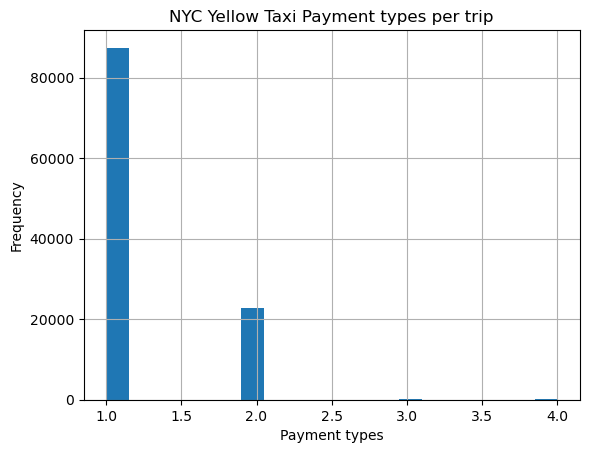

In [35]:
df5["payment_type"].hist(bins=20)
plt.title("NYC Yellow Taxi Payment types per trip")
plt.xlabel("Payment types")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

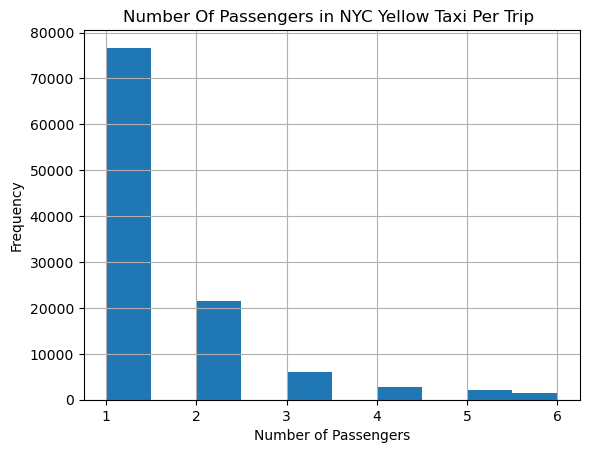

In [36]:
df5["passenger_count"].hist()
plt.title("Number Of Passengers in NYC Yellow Taxi Per Trip ")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")

Text(0, 0.5, 'Fare $')

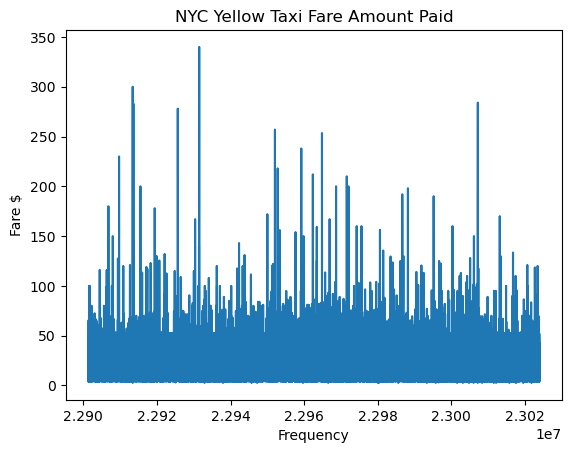

In [37]:
df5["fare_amount"].plot()
plt.title("NYC Yellow Taxi Fare Amount Paid")
plt.xlabel("Frequency")
plt.ylabel("Fare $")

Text(0, 0.5, 'Distance in Miles')

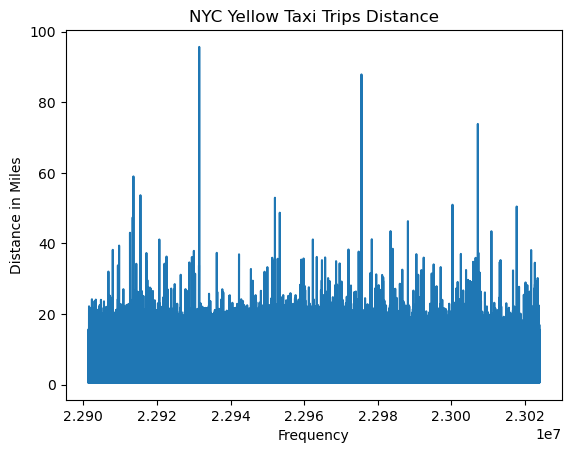

In [38]:
df5["trip_distance"].plot()
plt.title("NYC Yellow Taxi Trips Distance")
plt.xlabel("Frequency")
plt.ylabel("Distance in Miles")

# Step 7: multiple variable plots

Text(0, 0.5, 'Fare Amount $')

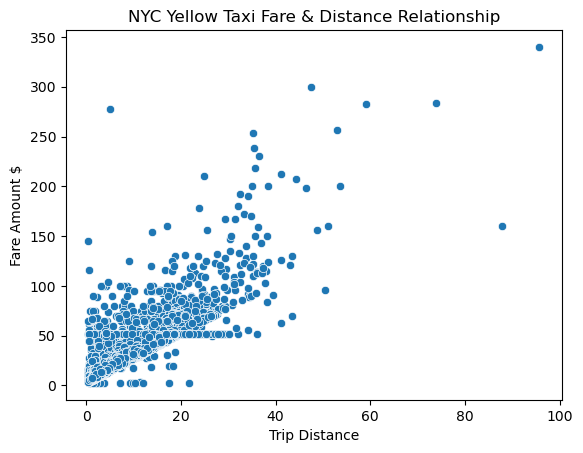

In [40]:
sns.scatterplot(x = "trip_distance", y = "fare_amount", data = df5)
plt.title("NYC Yellow Taxi Fare & Distance Relationship")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount $")

Text(0, 0.5, 'Fare Amount $')

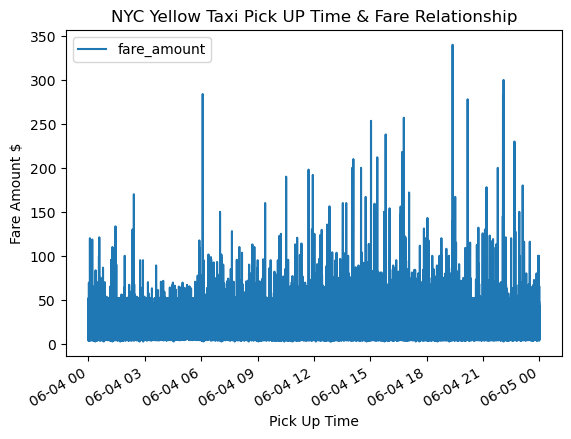

In [41]:
df5.plot(x = "tpep_pickup_datetime", y = "fare_amount")
plt.title("NYC Yellow Taxi Pick UP Time & Fare Relationship")
plt.xlabel("Pick Up Time")
plt.ylabel("Fare Amount $")

# Milestone #2

In [58]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

# Step 8: model 1

## a.
- Choose a column in your dataset to predict using some or all of the other columns.. This can either be a quantitative column to perform regression on, or a qualitative column to perform classification on.

### Decision Tree Regression model

In [45]:
df5

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22901374,2022-06-04 23:59:59,5.0,1.34,1,9.5,0
22901375,2022-06-04 23:59:59,1.0,1.01,2,6.0,0
22901376,2022-06-04 23:59:56,1.0,4.30,1,20.5,0
22901377,2022-06-04 23:59:55,1.0,1.54,2,8.5,0
22901378,2022-06-04 23:59:54,1.0,1.57,1,7.5,0
...,...,...,...,...,...,...
23023933,2022-06-04 00:00:00,2.0,16.96,2,52.0,0
23023934,2022-06-04 00:00:00,4.0,1.22,1,7.0,0
23023935,2022-06-04 00:00:00,1.0,4.52,2,15.5,0
23023936,2022-06-04 00:00:00,2.0,3.30,1,13.0,0


In [66]:
x = df5.drop(columns = ["fare_amount", "tpep_pickup_datetime"])
x

,passenger_count,trip_distance,payment_type,fare_error
22901374,5.0,1.34,1,0
22901375,1.0,1.01,2,0
22901376,1.0,4.30,1,0
22901377,1.0,1.54,2,0
22901378,1.0,1.57,1,0
...,...,...,...,...
23023933,2.0,16.96,2,0
23023934,4.0,1.22,1,0
23023935,1.0,4.52,2,0
23023936,2.0,3.30,1,0


In [50]:
y = df5 ["fare_amount"]
y

22901374     9.5
22901375     6.0
22901376    20.5
22901377     8.5
22901378     7.5
            ... 
23023933    52.0
23023934     7.0
23023935    15.5
23023936    13.0
23023937    13.0
Name: fare_amount, Length: 110472, dtype: float64

In [68]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(x, y)

DecisionTreeRegressor(max_depth=3)

In [71]:
from sklearn.tree import plot_tree

In [73]:
x.columns

Index(['passenger_count', 'trip_distance', 'payment_type', 'fare_error'], dtype='object')

[Text(0.5, 0.875, 'trip_distance <= 8.315\nsquared_error = 151.558\nsamples = 110472\nvalue = 14.268'),
 Text(0.25, 0.625, 'trip_distance <= 2.905\nsquared_error = 32.601\nsamples = 99988\nvalue = 11.08'),
 Text(0.125, 0.375, 'trip_distance <= 1.575\nsquared_error = 10.386\nsamples = 73566\nvalue = 8.591'),
 Text(0.0625, 0.125, 'squared_error = 6.377\nsamples = 39509\nvalue = 6.806'),
 Text(0.1875, 0.125, 'squared_error = 7.055\nsamples = 34057\nvalue = 10.661'),
 Text(0.375, 0.375, 'trip_distance <= 4.885\nsquared_error = 29.151\nsamples = 26422\nvalue = 18.012'),
 Text(0.3125, 0.125, 'squared_error = 13.997\nsamples = 17559\nvalue = 15.752'),
 Text(0.4375, 0.125, 'squared_error = 29.028\nsamples = 8863\nvalue = 22.488'),
 Text(0.75, 0.625, 'trip_distance <= 13.465\nsquared_error = 265.04\nsamples = 10484\nvalue = 44.667'),
 Text(0.625, 0.375, 'trip_distance <= 10.965\nsquared_error = 45.177\nsamples = 4818\nvalue = 33.168'),
 Text(0.5625, 0.125, 'squared_error = 32.285\nsamples = 328

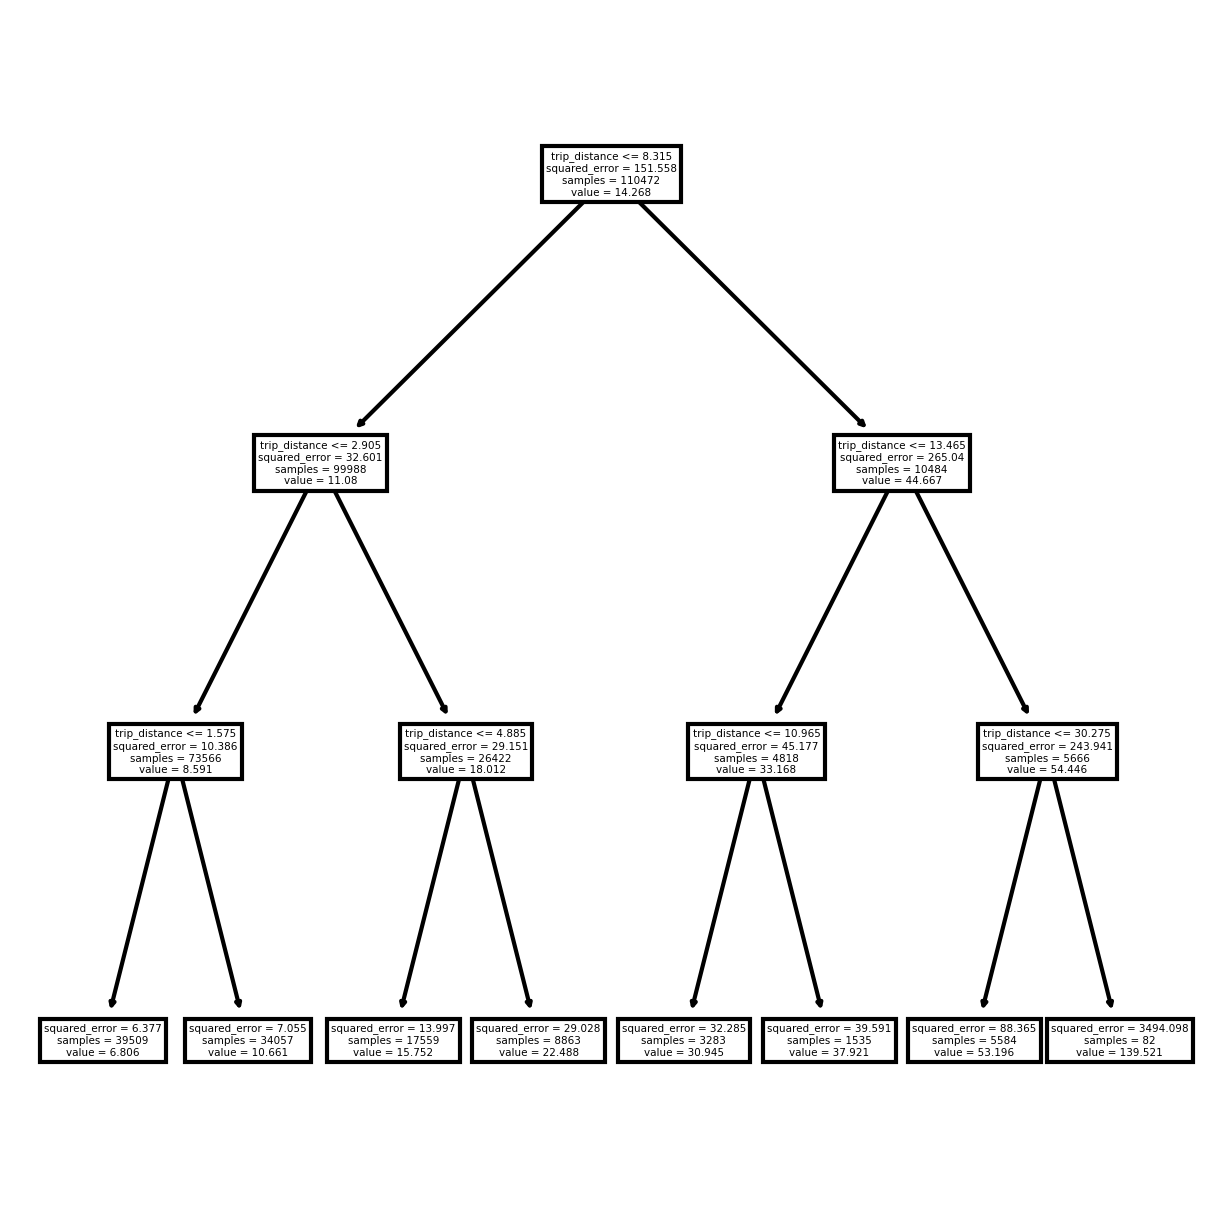

In [79]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(model, feature_names = ['passenger_count', 'trip_distance', 'payment_type', 'fare_error'])

 ## b.  
 #### - Prepare your data for machine learning:  split your data into training and testing data, and if necessary, create dummy variables or scale columns.

##### Training and testing data

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [96]:
x_train

,passenger_count,trip_distance,payment_type,fare_error
22948133,2.0,9.46,2,0
22902277,1.0,1.80,1,0
23008478,5.0,2.29,1,0
22992149,1.0,2.11,1,0
23000222,1.0,0.75,1,0
...,...,...,...,...
22908905,2.0,1.10,1,0
23015598,1.0,3.00,1,0
22919647,3.0,2.60,1,0
22907601,1.0,8.21,1,0


In [98]:
x_test

,passenger_count,trip_distance,payment_type,fare_error
22913717,2.0,1.66,1,0
22903213,1.0,11.15,1,0
22983709,1.0,2.24,2,0
22944743,1.0,2.43,1,0
22995396,1.0,2.40,1,0
...,...,...,...,...
22976220,1.0,0.64,1,0
22951252,1.0,0.93,1,0
22932074,1.0,1.85,2,0
23021257,2.0,2.85,1,0


#### C.
#### Fit a model that we covered in class to your training data.   The models covered in class are linear regression, polynomial regression, decision trees, k-nearest neighbors, and logistic regression.

In [101]:
tree1 = DecisionTreeRegressor(max_depth = 3)
tree1 = tree1.fit(x_train, y_train)

### D.
#### Evaluate the fit of your model using your testing and training data.  You should use the appropriate methods for your model.

In [113]:
tree1_pred = tree1.predict(x_test)

In [116]:
mean_squared_error(tree1_pred, y_test)

15.394566916517192

In [124]:
tree1_train_pred = tree1.predict(x_train)
mean_squared_error(tree1_train_pred, y_train)

18.170204336514242

In [129]:
max_depth = 3
MSE test: 15.3945
MSE train: 18.1702

### E.
#### Repeat steps (c) and (d) with at least two different parameters for your model.  For linear regression, you should use different subsets of the independent variables (for example, by dropping independent variables with high p-values)..

In [131]:
x2 = df5.drop(columns = ["fare_amount", "tpep_pickup_datetime", "passenger_count"])
x2

,trip_distance,payment_type,fare_error
22901374,1.34,1,0
22901375,1.01,2,0
22901376,4.30,1,0
22901377,1.54,2,0
22901378,1.57,1,0
...,...,...,...
23023933,16.96,2,0
23023934,1.22,1,0
23023935,4.52,2,0
23023936,3.30,1,0


In [253]:
X2.columns

Index(['trip_distance', 'payment_type', 'fare_error'], dtype='object')

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2)

In [141]:
tree2 = DecisionTreeRegressor(max_depth = 5)
tree2 = tree2.fit(x_train, y_train)

In [143]:
tree2_test_pred = tree2.predict(x_test)

In [145]:
mean_squared_error(tree2_test_pred, y_test)

16.60862076588014

In [147]:
tree2_train_pred = tree2.predict(x_train)
mean_squared_error(tree2_train_pred, y_train)

13.05354909004159

In [ ]:
max_depth = 5
MSE test: 16.6086
MSE train: 13.0535

In [135]:
x3 = df5.drop(columns = ["fare_amount", "tpep_pickup_datetime", "passenger_count", "payment_type", "fare_error"])
x3

,trip_distance
22901374,1.34
22901375,1.01
22901376,4.30
22901377,1.54
22901378,1.57
...,...
23023933,16.96
23023934,1.22
23023935,4.52
23023936,3.30


In [149]:
x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size=0.2)

In [151]:
tree3 = DecisionTreeRegressor(max_depth = 8)
tree3 = tree3.fit(x_train, y_train)

In [153]:
tree3_test_pred = tree3.predict(x_test)

In [155]:
mean_squared_error(tree3_test_pred, y_test)

15.741253666868488

In [157]:
tree3_train_pred = tree3.predict(x_train)
mean_squared_error(tree3_train_pred, y_train)

12.080551575209903

In [ ]:
max_depth = 8
MSE test: 15.7412
MSE train: 12.0805

#### f.
#### Post your code to GitHub.


#### g. 
#### Describe what prediction model and parameters you tried on your webpage, as well as how you evaluated the model/parameter combinations and the results of the evaluation (ex. pros and cons of this model/parameter combo).  Conclude with recommending which parameter to use with this model to get the best predictions for your data.

In [ ]:
max_depth = 3
MSE test: 15.3945
MSE train: 18.1702

In [ ]:
max_depth = 5
MSE test: 16.6086
MSE train: 13.0535

In [ ]:
max_depth = 8
MSE test: 15.7412
MSE train: 12.0805

- The models 5 and 8 have the test MSE higher than the train MSE. This indicate some overfitting. 
- The Decision Tree regression model with max_depth = 3 has the lowest test MSE but the highest train MSE.
- I would recommend max_depth = 3 model to predict the fare_amount of taxi trips. This model doesn't have overfitting and it has the best test MSE of all three.   

# Step 9: model 2

### a.
#### Fit a different model that the one used in Step 8 to your training data.  You must use a model covered in class (linear regression, polynomial regression, decision trees, k-nearest neighbors, logistic regression).


### Evaluate the fit of your 2nd model using your testing and training data.  You should use the appropriate methods for your model.


#### K-Nearest Neighbors Regression

In [194]:
from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [181]:
X = df5.drop(columns = ["fare_amount", "tpep_pickup_datetime"])
X

,passenger_count,trip_distance,payment_type,fare_error
22901374,5.0,1.34,1,0
22901375,1.0,1.01,2,0
22901376,1.0,4.30,1,0
22901377,1.0,1.54,2,0
22901378,1.0,1.57,1,0
...,...,...,...,...
23023933,2.0,16.96,2,0
23023934,4.0,1.22,1,0
23023935,1.0,4.52,2,0
23023936,2.0,3.30,1,0


In [183]:
Y = df5["fare_amount"]
Y

22901374     9.5
22901375     6.0
22901376    20.5
22901377     8.5
22901378     7.5
            ... 
23023933    52.0
23023934     7.0
23023935    15.5
23023936    13.0
23023937    13.0
Name: fare_amount, Length: 110472, dtype: float64

In [186]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [218]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [204]:
y_test_pred = knn.predict(x_test)
mean_squared_error(y_test_pred, y_test)

16.10782847684627

In [206]:
y_train_pred = knn.predict(x_train)
mean_squared_error(y_train_pred, y_train)

13.072947187593597

In [ ]:
n_neighbors = 7
MSE test: 16.1078
MSE train: 13.0729

Text(0, 0.5, 'error in prediction (residual)')

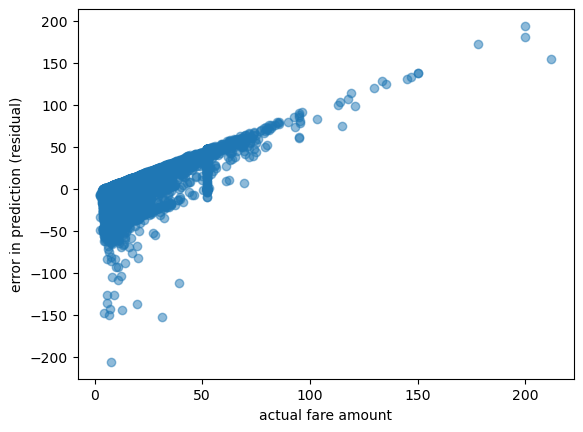

In [257]:
plt.scatter(y_test, y_test - y_test_pred, alpha = 0.5)
plt.xlabel("actual fare amount")
plt.ylabel("error in prediction (residual)")

#### b.
#### Repeat steps (c) and (d) with at least two different parameters for your 2nd model.  For linear regression, you can use different subsets of the independent variables (for example, by dropping independent variables with high p-values).


In [212]:
X2 = df5.drop(columns = ["fare_amount", "tpep_pickup_datetime", "passenger_count"])
#X2

In [214]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2)

In [220]:
knn2 = KNeighborsRegressor(n_neighbors = 4)
knn2.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [222]:
y_test_pred2 = knn2.predict(x_test)
mean_squared_error(y_test_pred2, y_test)

16.33220489137814

In [224]:
y_train_pred2 = knn2.predict(x_train)
mean_squared_error(y_train_pred2, y_train)

13.352157602020323

In [ ]:
n_neighbors = 4
MSE test: 16.3322
MSE train: 13.3521

In [228]:
X3 = df5.drop(columns = ["fare_amount", "tpep_pickup_datetime", "passenger_count", "payment_type", "fare_error"])
#X3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X3, Y, test_size=0.2)

In [230]:
knn3 = KNeighborsRegressor(n_neighbors = 10)
knn3.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [232]:
y_test_pred3 = knn3.predict(x_test)
mean_squared_error(y_test_pred3, y_test)

14.134214674677528

In [234]:
y_train_pred3 = knn3.predict(x_train)
mean_squared_error(y_train_pred3, y_train)

13.701913598730437

In [ ]:
n_neighbors = 10
MSE test: 16.1342
MSE train: 13.7019

 #### C. Post your code to GitHub.


#### D. ___Describe what prediction model and parameters you tried on your webpage, as well as how you evaluated the model/parameter combinations and the results of the evaluation (ex. pros and cons of this model/parameter combo).  Conclude with recommending which parameter to use with this 2nd model to get the best predictions for your data.


In [ ]:
n_neighbors = 7
MSE test: 16.1078
MSE train: 13.0729

In [ ]:
n_neighbors = 4
MSE test: 16.3322
MSE train: 13.3521

In [ ]:
n_neighbors = 10
MSE test: 16.1342
MSE train: 13.7019

- The K-Nearest Neighbors Regression model n_neighbors = 7 has the lowest MSE of all three models.
- I would recommend n_neighbors = 7 to predict the fare_amount in taxi trips.

#### E. Compare the how well Model 1 (Step 8) and Model 2 (Step 9) preformed on your data, and make a final recommendation of which model to use to make the predictions.

In [ ]:
# Model 1 Decision Tree Regression model
max_depth = 3
MSE test: 15.3945
MSE train: 18.1702

In [ ]:
# Model 2 K-Nearest Neighbors Regression
n_neighbors = 7
MSE test: 16.1078
MSE train: 13.0729

 - Model 1 has a better test MSE 15.3945 than Model 2: 16.1078
 - Model 2 test MSE is higher than train MSE. This indicate some overfitting.
 - I would recommend Model 1 Decision Tree Regression model with max_depth = 3 to predict the fare_amount in our taxi trips dataset.